In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 43.3 MB/s eta 0:00:00
   

In [ ]:
pip install numpy>=1.20

In [ ]:
pip install scipy>=1.6

In [ ]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
#Load data set
from google.colab import files
files.upload()

Saving Beauty.csv to Beauty.csv


In [ ]:
amazon_ratings = pd.read_csv('Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
amazon_ratings.shape

(2023070, 4)

In [ ]:
amazon_ratings.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [ ]:
amazon_ratings.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

In [ ]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 77.2+ MB


# **Null data Analysis**

In [ ]:
# If dataset had null values we can use this code to drop all the null values present in the dataset
# amazon_ratings=amazon_ratings.dropna()
# print('Null Values:',amazon_ratings.isnull().values.sum())
# print('NA values:',amazon_ratings.isnull().values.any())

print('Null Values:',amazon_ratings.isnull().values.sum())

Null Values: 0


In [ ]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


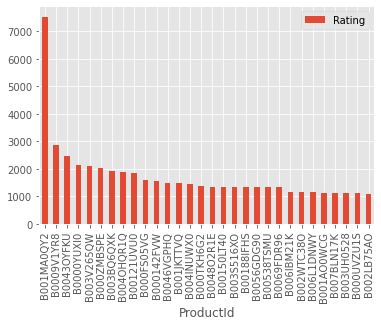

In [ ]:
most_popular.head(30).plot(kind = "bar")

# **Analysis:**

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

## **Recommendation System - Part II**

**Model-based collaborative filtering system**
> Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
 ><br>A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.




Utility Matrix based on products sold and user reviews
<br>Utility Matrix : An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [ ]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [ ]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [ ]:
ratings_utility_matrix.shape

(9697, 886)

**Transposing the matrix**

In [ ]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(886, 9697)

**Unique products in subset of data**

In [ ]:
X1 = X

In [ ]:

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

**Correlation Matrix**

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
correlation_matrix

array([[ 1.        ,  0.38582862,  0.60370292, ...,  0.02864225,
         0.12900943, -0.53622116],
       [ 0.38582862,  1.        , -0.16998752, ..., -0.14205139,
         0.27096115,  0.27576231],
       [ 0.60370292, -0.16998752,  1.        , ...,  0.29120809,
         0.35586878, -0.38897645],
       ...,
       [ 0.02864225, -0.14205139,  0.29120809, ...,  1.        ,
         0.27102246,  0.04003139],
       [ 0.12900943,  0.27096115,  0.35586878, ...,  0.27102246,
         1.        ,  0.58906407],
       [-0.53622116,  0.27576231, -0.38897645, ...,  0.04003139,
         0.58906407,  1.        ]])

Assuming the customer buys Product ID # 9573215926 (randomly chosen)

In [ ]:
X.index[148]

'9573215926'

Index number of product ID purchased by customer

In [ ]:
i = "9573215926"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

148

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

**Recommending top 10 highly correlated products in sequence**

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['1987958179',
 '3227001055',
 '3423470476',
 '4057362894',
 '4057362967',
 '4057368825',
 '6022600685',
 '6022600804',
 '6040652705']

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website

## **Recommendation System - Part III**

> For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

> <br> Dataset : Home Depot's dataset with product dataset.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# **Item to item based recommendation system based on product description**
Applicable when business is setting up its E-commerce website for the first time

In [ ]:
#Load data set
from google.colab import files
files.upload()

Saving product_descriptions.csv to product_descriptions.csv


In [ ]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [ ]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

Feature extraction from product descriptions
Converting the text in product description into numerical data for analysis

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

# Visualizing product clusters in subset of data

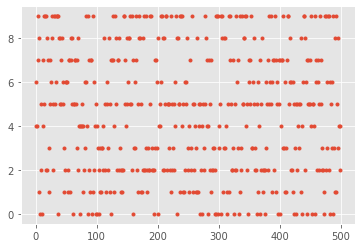

In [ ]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

# **Output**

Recommendation of product based on the current product selected by user.
<br>To recommend related product based on, Frequently bought together.

In [ ]:
# # Optimal clusters is

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 post
 posts
 wall
 fence
 speaker
 plate
 deck
 wood
 style
 structural
Cluster 1:
 lbs
 storage
 step
 easy
 unit
 shelves
 heavy
 wheels
 tool
 grip
Cluster 2:
 metal
 steel
 gauge
 20
 drill
 hole
 screw
 screws
 work
 tool
Cluster 3:
 door
 energy
 ladder
 attic
 aluminum
 easy
 ft
 provides
 cycle
 insulation
Cluster 4:
 water
 easy
 heater
 air
 tank
 year
 gas
 snow
 helps
 temperature
Cluster 5:
 rug
 vary
 shades
 slightly
 size
 order
 dimensions
 product
 bamboo
 window
Cluster 6:
 brass
 ball
 cutting
 commercial
 use
 design
 tile
 m12
 pruner
 water
Cluster 7:
 frame
 patio
 piece
 dining
 outdoor
 fabric
 cushions
 collection
 wicker
 steel
Cluster 8:
 light
 ft
 watt
 power
 home
 fan
 led
 white
 room
 air
Cluster 9:
 paint
 concrete
 brush
 wood
 finish
 easy
 use
 based
 used
 ft


Predicting clusters based on key search words

In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word

Search for Keyword : cutting tool

In [ ]:
show_recommendations("cutting tool")

Cluster 6:
 brass
 ball
 cutting
 commercial
 use
 design
 tile
 m12
 pruner
 water


Keyword : spray paint

In [ ]:
show_recommendations("spray paint")

Cluster 9:
 paint
 concrete
 brush
 wood
 finish
 easy
 use
 based
 used
 ft


Keyword : steel drill

In [ ]:
show_recommendations("steel drill")

Cluster 2:
 metal
 steel
 gauge
 20
 drill
 hole
 screw
 screws
 work
 tool


Keyword : water

In [ ]:
show_recommendations("water")


NameError: ignored

Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

# **Summary:**
<br>This works best if a company is creating its first e-commerce website and does not have any user-item purchase/rating history to begin with. This recommendation system will assist users in receiving a good recommendation to begin with, and once the buyers have a purchasing history, the recommendation engine will employ the model-based collaborative filtering technique.